1)open source api

In [1]:
import requests

url = "https://sports-information.p.rapidapi.com/nba/schedule-team"

querystring = {"teamId":"16","season":"2021"}

headers = {
	"X-RapidAPI-Key": "737db4c732msh6808b0d41755dfbp1890c4jsn1781b167b094",
	"X-RapidAPI-Host": "sports-information.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'timestamp': '2024-04-17T01:36:39Z', 'status': 'success', 'season': {'year': 2024, 'type': 5, 'name': 'Play-In Season', 'displayName': '2023-24', 'half': 1}, 'team': {'id': '16', 'abbreviation': 'MIN', 'location': 'Minnesota', 'name': 'Timberwolves', 'displayName': 'Minnesota Timberwolves', 'clubhouse': 'https://www.espn.com/nba/team/_/name/min/minnesota-timberwolves', 'color': '266092', 'logo': 'https://a.espncdn.com/i/teamlogos/nba/500/min.png', 'recordSummary': '56-26', 'seasonSummary': '2023-24', 'standingSummary': '3rd in Northwest Division', 'groups': {'id': '11', 'parent': {'id': '6'}, 'isConference': False}}, 'events': [{'id': '401267178', 'date': '2020-12-24T01:00Z', 'name': 'Detroit Pistons at Minnesota Timberwolves', 'shortName': 'DET @ MIN', 'season': {'year': 2021, 'displayName': '2020-21'}, 'seasonType': {'id': '2', 'type': 2, 'name': 'Regular Season', 'abbreviation': 'reg'}, 'timeValid': True, 'competitions': [{'id': '401267178', 'date': '2020-12-24T01:00Z', 'attendance

Dashboard

In [10]:
import requests

# Define function to fetch NBA schedule data
def get_nba_schedule(team_id, season):
    url = "https://sports-information.p.rapidapi.com/nba/schedule-team"
    querystring = {"teamId": team_id, "season": season}
    headers = {
        "X-RapidAPI-Key": "YOUR_RAPIDAPI_KEY",
        "X-RapidAPI-Host": "sports-information.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        return response.json()['games']
    else:
        return None

# User input for team ID and season
team_id = int(input("Enter Team ID (1-30): "))
season = input("Enter Season (e.g., 2021): ")

# Fetch and display NBA schedule
schedule = get_nba_schedule(team_id, season)
if schedule:
    print("NBA Schedule:")
    for game in schedule:
        print(f"- {game['date']} - {game['homeTeam']} vs {game['awayTeam']}")
else:
    print("Failed to retrieve NBA schedule. Please check your input and try again.")



Enter Team ID (1-30): 12
Enter Season (e.g., 2021): 2021
Failed to retrieve NBA schedule. Please check your input and try again.


2nd question diabetes.csv

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('/content/diabetes.csv')

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
np.random.seed(250)
sample = df.sample(25)

In [15]:
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

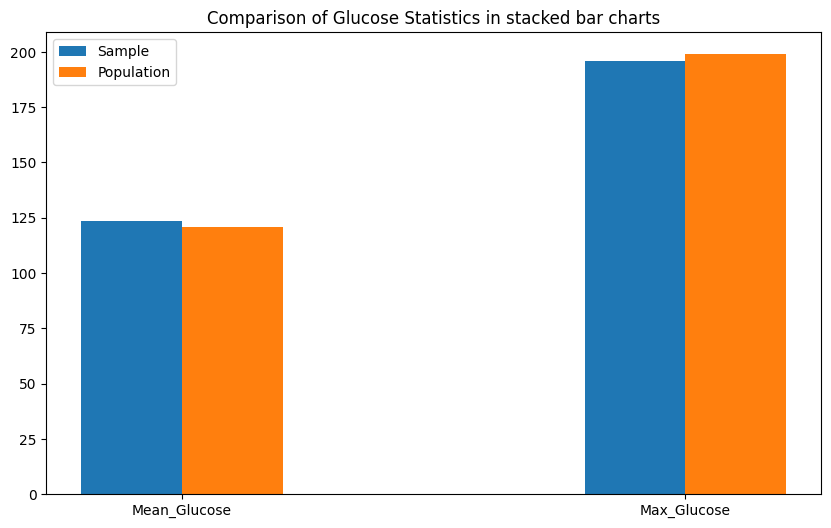

In [16]:
#comparing mean and highest Glucose values for sample and population
labels = ['Mean_Glucose', 'Max_Glucose']
sample_values = [sample_mean_glucose, sample_max_glucose]
population_values = [population_mean_glucose, population_max_glucose]

x = np.arange(len(labels))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, sample_values, width, label='Sample')
bars2 = ax.bar(x + width/2, population_values, width, label='Population')

ax.set_title('Comparison of Glucose Statistics in stacked bar charts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

b 98th percentile of BMI sample and population

In [17]:
#  98th percentile of BMI for sample and population
sample_98th_percentile = np.percentile(sample['BMI'], 98)
population_98th_population = np.percentile(df['BMI'], 98)

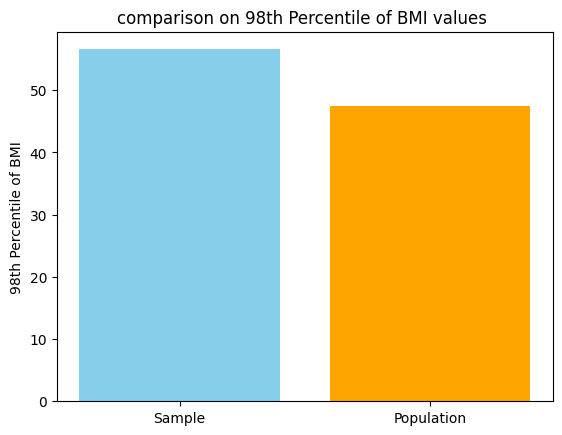

In [18]:
# Create a bar plot to compare the 98th percentile of BMI
plt.bar(['Sample', 'Population'], [sample_98th_percentile, population_98th_population ], color=['skyblue', 'orange'])
plt.title('comparison on 98th Percentile of BMI values ')
plt.ylabel('98th Percentile of BMI')
plt.show()

c bootstrap

In [19]:
# creating 500 samples
bootstrap_samples = 500
#150 observation of each bootstrap sample
bootstrap_sample_size = 150

bs_means = []
bs_std_devs = []
bs_percentiles = []

for i in range(bootstrap_samples):
    bootstrap_sample = df['BloodPressure'].sample(bootstrap_sample_size, replace=True)
    bs_mean = bootstrap_sample.mean()
    bs_std_dev = bootstrap_sample.std()
    bs_percentile = np.percentile(bootstrap_sample, 98)
    bs_means.append(bs_mean)
    bs_std_devs.append(bs_std_dev)
    bs_percentiles.append(bs_percentile)

# bootstrap statistics

bootstrap_mean = np.mean(bs_means)
bootstrap_std_dev = np.mean(bs_std_devs)
bootstrap_percentile = np.mean(bs_percentiles)

# population statistics
population_mean = df['BloodPressure'].mean()
population_std_dev = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 98)



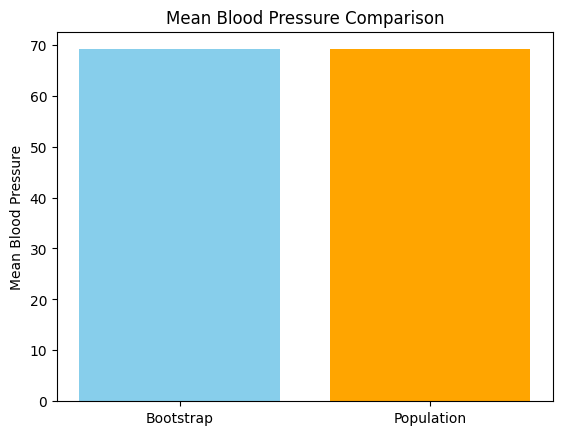

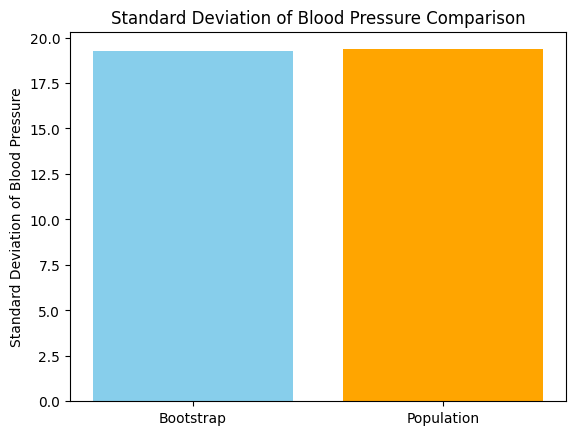

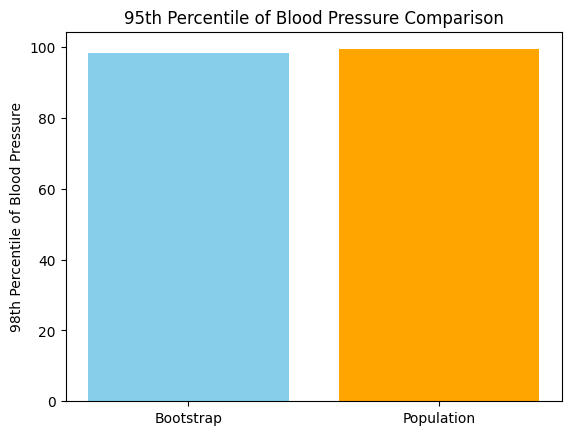

In [21]:
# Create a bar plot to compare mean Blood Pressure values
plt.bar(['Bootstrap', 'Population'], [bootstrap_mean, population_mean], color=['skyblue', 'orange'])
plt.title('Mean Blood Pressure Comparison')
plt.ylabel('Mean Blood Pressure')
plt.show()

# Create a bar plot to compare standard deviation of Blood Pressure values
plt.bar(['Bootstrap', 'Population'], [bootstrap_std_dev, population_std_dev], color=['skyblue', 'orange'])
plt.title('Standard Deviation of Blood Pressure Comparison')
plt.ylabel('Standard Deviation of Blood Pressure')
plt.show()

# Create a bar plot to compare 95th percentile of Blood Pressure values
plt.bar(['Bootstrap', 'Population'], [bootstrap_percentile, population_percentile], color=['skyblue', 'orange'])
plt.title('95th Percentile of Blood Pressure Comparison')
plt.ylabel('98th Percentile of Blood Pressure')
plt.show()
